In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tempfile
import keras
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras import layers
from tensorflow.keras import Model
import numpy as np
from keras.preprocessing import image

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! kaggle datasets download -d techsash/waste-classification-data

 99% 422M/427M [00:02<00:00, 143MB/s]
100% 427M/427M [00:03<00:00, 146MB/s]


In [ ]:
! unzip waste-classification-data.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/DATASET/TRAIN/R/R_5499.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_55.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_550.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5500.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5501.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5502.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5503.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5504.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5505.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5506.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5507.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5508.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5509.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_551.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5510.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5511.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5512.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5513.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5514.jpg  
  i

In [ ]:
base_dir="/content/DATASET"
train_dir=os.path.join(base_dir,"TRAIN")
test_dir=os.path.join(base_dir,"TEST")

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.1,
                                 zoom_range=0.1,
                                 horizontal_flip=True)

validation_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator=train_datagen.flow_from_directory(train_dir,
                                                  target_size=(150,150),
                                                  batch_size=64,
                                                  class_mode='binary')

validation_generator=validation_datagen.flow_from_directory(test_dir,
                                                            target_size=(150,150),
                                                            batch_size=64,
                                                            class_mode='binary')

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
pretrain_1=InceptionV3(input_shape=(150,150,3),include_top=False,weights='imagenet')
for layer in pretrain_1.layers:
      layer.trainable = False
last_layer = pretrain_1.get_layer('mixed7')

In [ ]:
pretrain_2=MobileNet(input_shape=(150,150,3),include_top=False,weights='imagenet')
for layers_1 in pretrain_2.layers:
  layers_1.trainable=False

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
model = tf.keras.models.Sequential([
        # YOUR CODE HERE, end with a Neuron Dense, activated by 'sigmoid'
        tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

In [ ]:
xx = layers.Flatten()(last_layer.output)
xx = layers.Dense(1024,activation='relu')(xx)
xx = layers.Dropout(0.2)(xx)
xx = layers.Dense(32, activation='sigmoid')(xx)
xx = layers.Dropout(0.2)(xx)
xx = layers.Dense(1, activation='sigmoid')(xx)

model_1 = Model(pretrain_1.input, xx)

In [ ]:
model_2=tf.keras.models.Sequential([
                                    pretrain_2,
                                    tf.keras.layers.Dense(1,activation='relu'),
                                    tf.keras.layers.GlobalAveragePooling2D(),
                                    tf.keras.layers.Dense(1,activation='sigmoid')])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self,epoch,logs={}):
        if((logs.get('accuracy')>0.85) and (logs.get('val_accuracy')>0.85)):
          self.model.stop_training = True

In [ ]:
model.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=["accuracy"])
model.fit(train_generator,steps_per_epoch=25,epochs=50,validation_data=validation_generator,validation_steps=5,verbose=2,callbacks=myCallback())

Epoch 1/50
25/25 - 21s - loss: 0.9039 - accuracy: 0.6250 - val_loss: 0.4179 - val_accuracy: 0.8219 - 21s/epoch - 836ms/step
Epoch 2/50
25/25 - 11s - loss: 0.5344 - accuracy: 0.7575 - val_loss: 0.4095 - val_accuracy: 0.8375 - 11s/epoch - 451ms/step
Epoch 3/50
25/25 - 11s - loss: 0.4407 - accuracy: 0.8050 - val_loss: 0.3193 - val_accuracy: 0.8844 - 11s/epoch - 452ms/step
Epoch 4/50
25/25 - 12s - loss: 0.4672 - accuracy: 0.7875 - val_loss: 0.3459 - val_accuracy: 0.8969 - 12s/epoch - 469ms/step
Epoch 5/50
25/25 - 11s - loss: 0.4816 - accuracy: 0.7937 - val_loss: 0.3598 - val_accuracy: 0.8594 - 11s/epoch - 452ms/step
Epoch 6/50
25/25 - 11s - loss: 0.4252 - accuracy: 0.8081 - val_loss: 0.4185 - val_accuracy: 0.8219 - 11s/epoch - 446ms/step
Epoch 7/50
25/25 - 11s - loss: 0.4327 - accuracy: 0.8169 - val_loss: 0.4022 - val_accuracy: 0.8375 - 11s/epoch - 447ms/step
Epoch 8/50
25/25 - 11s - loss: 0.4370 - accuracy: 0.8125 - val_loss: 0.3781 - val_accuracy: 0.8719 - 11s/epoch - 447ms/step
Epoch 9/

In [ ]:
model_1.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=["accuracy"])
model_1.fit(train_generator,steps_per_epoch=25,epochs=50,validation_data=validation_generator,validation_steps=5,verbose=2,callbacks=myCallback())

Epoch 1/50
25/25 - 18s - loss: 0.4897 - accuracy: 0.7925 - val_loss: 0.3644 - val_accuracy: 0.8687 - 18s/epoch - 719ms/step
Epoch 2/50
25/25 - 12s - loss: 0.3417 - accuracy: 0.8838 - val_loss: 0.3618 - val_accuracy: 0.8531 - 12s/epoch - 470ms/step


In [ ]:
model_2.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=["accuracy"])
model_2.fit(train_generator,steps_per_epoch=25,epochs=50,validation_data=validation_generator,validation_steps=5,verbose=2,callbacks=myCallback())

Epoch 1/50
25/25 - 15s - loss: 0.7103 - accuracy: 0.5175 - val_loss: 0.6921 - val_accuracy: 0.5625 - 15s/epoch - 581ms/step
Epoch 2/50
25/25 - 11s - loss: 0.6920 - accuracy: 0.5512 - val_loss: 0.6910 - val_accuracy: 0.5688 - 11s/epoch - 450ms/step
Epoch 3/50
25/25 - 11s - loss: 0.6901 - accuracy: 0.5800 - val_loss: 0.6901 - val_accuracy: 0.5688 - 11s/epoch - 454ms/step
Epoch 4/50
25/25 - 11s - loss: 0.6888 - accuracy: 0.5813 - val_loss: 0.6896 - val_accuracy: 0.5594 - 11s/epoch - 459ms/step
Epoch 5/50
25/25 - 11s - loss: 0.6903 - accuracy: 0.5487 - val_loss: 0.6902 - val_accuracy: 0.5469 - 11s/epoch - 456ms/step
Epoch 6/50
25/25 - 11s - loss: 0.6874 - accuracy: 0.5763 - val_loss: 0.6901 - val_accuracy: 0.5437 - 11s/epoch - 455ms/step
Epoch 7/50
25/25 - 12s - loss: 0.6875 - accuracy: 0.5688 - val_loss: 0.6917 - val_accuracy: 0.5281 - 12s/epoch - 461ms/step
Epoch 8/50
25/25 - 11s - loss: 0.6889 - accuracy: 0.5494 - val_loss: 0.6887 - val_accuracy: 0.5531 - 11s/epoch - 457ms/step
Epoch 9/

Saving bottle.jfif to bottle.jfif
Anorganik
Anorganik


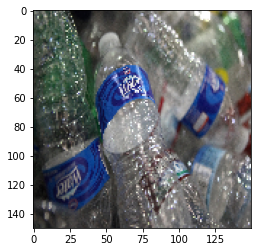

In [ ]:
uploaded = files.upload()                                                         

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(150, 150))                             
  imgplot = plt.imshow(img)                                                       
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  classes_1=model_1.predict(images,batch_size=10)
  
  if classes==0:
    classes="Organik"
  else:
    classes="Anorganik"
  
  if classes_1==0:
    classes_1="Organik"
  else:
    classes_1="Anorganik"

  print(classes)
  print(classes_1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mounted at /content/drive


In [ ]:
tf.saved_model.save(model,"/content/drive/MyDrive/File Program MBKM/Project Capestone/Model_Sequensial")
tf.saved_model.save(model_1,"/content/drive/MyDrive/File Program MBKM/Project Capestone/Model_InceptionV3")
tf.saved_model.save(model_2,"/content/drive/MyDrive/File Program MBKM/Project Capestone/Model_MobileNet")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/File Program MBKM/Project Capestone/Model_Sequensial/assets
INFO:tensorflow:Assets written to: /content/drive/MyDrive/File Program MBKM/Project Capestone/Model_InceptionV3/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/File Program MBKM/Project Capestone/Model_MobileNet/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/File Program MBKM/Project Capestone/Model_MobileNet/assets


In [ ]:
# Convert the model
Model_InceptionV3 = r"/content/drive/MyDrive/File Program MBKM/Project Capestone/Model_InceptionV3"
# Convert the model
converter = tf.compat.v1.lite.TFLiteConverter.from_saved_model(Model_InceptionV3) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.loader.load or tf.compat.v1.saved_model.load. There will be a new function for importing SavedModels in Tensorflow 2.0.


Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.loader.load or tf.compat.v1.saved_model.load. There will be a new function for importing SavedModels in Tensorflow 2.0.


INFO:tensorflow:Restoring parameters from /content/drive/MyDrive/File Program MBKM/Project Capestone/Model_InceptionV3/variables/variables


INFO:tensorflow:Restoring parameters from /content/drive/MyDrive/File Program MBKM/Project Capestone/Model_InceptionV3/variables/variables


INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'serving_default', '__saved_model_init_op'}


INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'serving_default', '__saved_model_init_op'}


INFO:tensorflow:input tensors info: 


INFO:tensorflow:input tensors info: 


INFO:tensorflow:Tensor's key in saved_model's tensor_map: input_1


INFO:tensorflow:Tensor's key in saved_model's tensor_map: input_1


INFO:tensorflow: tensor name: serving_default_input_1:0, shape: (-1, 150, 150, 3), type: DT_FLOAT


INFO:tensorflow: tensor name: serving_default_input_1:0, shape: (-1, 150, 150, 3), type: DT_FLOAT


INFO:tensorflow:output tensors info: 


INFO:tensorflow:output tensors info: 


INFO:tensorflow:Tensor's key in saved_model's tensor_map: dense_4


INFO:tensorflow:Tensor's key in saved_model's tensor_map: dense_4


INFO:tensorflow: tensor name: StatefulPartitionedCall:0, shape: (-1, 1), type: DT_FLOAT


INFO:tensorflow: tensor name: StatefulPartitionedCall:0, shape: (-1, 1), type: DT_FLOAT


INFO:tensorflow:Restoring parameters from /content/drive/MyDrive/File Program MBKM/Project Capestone/Model_InceptionV3/variables/variables


INFO:tensorflow:Restoring parameters from /content/drive/MyDrive/File Program MBKM/Project Capestone/Model_InceptionV3/variables/variables


Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`


Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`


Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`


Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`


INFO:tensorflow:Restoring parameters from /content/drive/MyDrive/File Program MBKM/Project Capestone/Model_InceptionV3/variables/variables


INFO:tensorflow:Restoring parameters from /content/drive/MyDrive/File Program MBKM/Project Capestone/Model_InceptionV3/variables/variables


INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'serving_default', '__saved_model_init_op'}


INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'serving_default', '__saved_model_init_op'}


INFO:tensorflow:input tensors info: 


INFO:tensorflow:input tensors info: 


INFO:tensorflow:Tensor's key in saved_model's tensor_map: input_1


INFO:tensorflow:Tensor's key in saved_model's tensor_map: input_1


INFO:tensorflow: tensor name: serving_default_input_1:0, shape: (-1, 150, 150, 3), type: DT_FLOAT


INFO:tensorflow: tensor name: serving_default_input_1:0, shape: (-1, 150, 150, 3), type: DT_FLOAT


INFO:tensorflow:output tensors info: 


INFO:tensorflow:output tensors info: 


INFO:tensorflow:Tensor's key in saved_model's tensor_map: dense_4


INFO:tensorflow:Tensor's key in saved_model's tensor_map: dense_4


INFO:tensorflow: tensor name: StatefulPartitionedCall:0, shape: (-1, 1), type: DT_FLOAT


INFO:tensorflow: tensor name: StatefulPartitionedCall:0, shape: (-1, 1), type: DT_FLOAT


INFO:tensorflow:Restoring parameters from /content/drive/MyDrive/File Program MBKM/Project Capestone/Model_InceptionV3/variables/variables


INFO:tensorflow:Restoring parameters from /content/drive/MyDrive/File Program MBKM/Project Capestone/Model_InceptionV3/variables/variables
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@

In [ ]:
# Convert the model
Model_MobileNet = r"/content/drive/MyDrive/File Program MBKM/Project Capestone/Model_MobileNet"
converter = tf.compat.v1.lite.TFLiteConverter.from_saved_model(Model_MobileNet) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('Model_MobileNet.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Restoring parameters from /content/drive/MyDrive/File Program MBKM/Project Capestone/Model_MobileNet/variables/variables


INFO:tensorflow:Restoring parameters from /content/drive/MyDrive/File Program MBKM/Project Capestone/Model_MobileNet/variables/variables


INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'serving_default', '__saved_model_init_op'}


INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'serving_default', '__saved_model_init_op'}


INFO:tensorflow:input tensors info: 


INFO:tensorflow:input tensors info: 


INFO:tensorflow:Tensor's key in saved_model's tensor_map: mobilenet_1.00_224_input


INFO:tensorflow:Tensor's key in saved_model's tensor_map: mobilenet_1.00_224_input


INFO:tensorflow: tensor name: serving_default_mobilenet_1.00_224_input:0, shape: (-1, 150, 150, 3), type: DT_FLOAT


INFO:tensorflow: tensor name: serving_default_mobilenet_1.00_224_input:0, shape: (-1, 150, 150, 3), type: DT_FLOAT


INFO:tensorflow:output tensors info: 


INFO:tensorflow:output tensors info: 


INFO:tensorflow:Tensor's key in saved_model's tensor_map: dense_6


INFO:tensorflow:Tensor's key in saved_model's tensor_map: dense_6


INFO:tensorflow: tensor name: StatefulPartitionedCall:0, shape: (-1, 1), type: DT_FLOAT


INFO:tensorflow: tensor name: StatefulPartitionedCall:0, shape: (-1, 1), type: DT_FLOAT


INFO:tensorflow:Restoring parameters from /content/drive/MyDrive/File Program MBKM/Project Capestone/Model_MobileNet/variables/variables


INFO:tensorflow:Restoring parameters from /content/drive/MyDrive/File Program MBKM/Project Capestone/Model_MobileNet/variables/variables


INFO:tensorflow:Restoring parameters from /content/drive/MyDrive/File Program MBKM/Project Capestone/Model_MobileNet/variables/variables


INFO:tensorflow:Restoring parameters from /content/drive/MyDrive/File Program MBKM/Project Capestone/Model_MobileNet/variables/variables


INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'serving_default', '__saved_model_init_op'}


INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'serving_default', '__saved_model_init_op'}


INFO:tensorflow:input tensors info: 


INFO:tensorflow:input tensors info: 


INFO:tensorflow:Tensor's key in saved_model's tensor_map: mobilenet_1.00_224_input


INFO:tensorflow:Tensor's key in saved_model's tensor_map: mobilenet_1.00_224_input


INFO:tensorflow: tensor name: serving_default_mobilenet_1.00_224_input:0, shape: (-1, 150, 150, 3), type: DT_FLOAT


INFO:tensorflow: tensor name: serving_default_mobilenet_1.00_224_input:0, shape: (-1, 150, 150, 3), type: DT_FLOAT


INFO:tensorflow:output tensors info: 


INFO:tensorflow:output tensors info: 


INFO:tensorflow:Tensor's key in saved_model's tensor_map: dense_6


INFO:tensorflow:Tensor's key in saved_model's tensor_map: dense_6


INFO:tensorflow: tensor name: StatefulPartitionedCall:0, shape: (-1, 1), type: DT_FLOAT


INFO:tensorflow: tensor name: StatefulPartitionedCall:0, shape: (-1, 1), type: DT_FLOAT


INFO:tensorflow:Restoring parameters from /content/drive/MyDrive/File Program MBKM/Project Capestone/Model_MobileNet/variables/variables


INFO:tensorflow:Restoring parameters from /content/drive/MyDrive/File Program MBKM/Project Capestone/Model_MobileNet/variables/variables
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf

In [ ]:
# Convert the model
Model_Sequensial = r"/content/drive/MyDrive/File Program MBKM/Project Capestone/Model_Sequensial"
converter = tf.compat.v1.lite.TFLiteConverter.from_saved_model(Model_Sequensial) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('Model_Sequensial.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Restoring parameters from /content/drive/MyDrive/File Program MBKM/Project Capestone/Model_Sequensial/variables/variables


INFO:tensorflow:Restoring parameters from /content/drive/MyDrive/File Program MBKM/Project Capestone/Model_Sequensial/variables/variables


INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'serving_default', '__saved_model_init_op'}


INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'serving_default', '__saved_model_init_op'}


INFO:tensorflow:input tensors info: 


INFO:tensorflow:input tensors info: 


INFO:tensorflow:Tensor's key in saved_model's tensor_map: conv2d_94_input


INFO:tensorflow:Tensor's key in saved_model's tensor_map: conv2d_94_input


INFO:tensorflow: tensor name: serving_default_conv2d_94_input:0, shape: (-1, 150, 150, 3), type: DT_FLOAT


INFO:tensorflow: tensor name: serving_default_conv2d_94_input:0, shape: (-1, 150, 150, 3), type: DT_FLOAT


INFO:tensorflow:output tensors info: 


INFO:tensorflow:output tensors info: 


INFO:tensorflow:Tensor's key in saved_model's tensor_map: dense_1


INFO:tensorflow:Tensor's key in saved_model's tensor_map: dense_1


INFO:tensorflow: tensor name: StatefulPartitionedCall:0, shape: (-1, 1), type: DT_FLOAT


INFO:tensorflow: tensor name: StatefulPartitionedCall:0, shape: (-1, 1), type: DT_FLOAT


INFO:tensorflow:Restoring parameters from /content/drive/MyDrive/File Program MBKM/Project Capestone/Model_Sequensial/variables/variables


INFO:tensorflow:Restoring parameters from /content/drive/MyDrive/File Program MBKM/Project Capestone/Model_Sequensial/variables/variables


INFO:tensorflow:Restoring parameters from /content/drive/MyDrive/File Program MBKM/Project Capestone/Model_Sequensial/variables/variables


INFO:tensorflow:Restoring parameters from /content/drive/MyDrive/File Program MBKM/Project Capestone/Model_Sequensial/variables/variables


INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'serving_default', '__saved_model_init_op'}


INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'serving_default', '__saved_model_init_op'}


INFO:tensorflow:input tensors info: 


INFO:tensorflow:input tensors info: 


INFO:tensorflow:Tensor's key in saved_model's tensor_map: conv2d_94_input


INFO:tensorflow:Tensor's key in saved_model's tensor_map: conv2d_94_input


INFO:tensorflow: tensor name: serving_default_conv2d_94_input:0, shape: (-1, 150, 150, 3), type: DT_FLOAT


INFO:tensorflow: tensor name: serving_default_conv2d_94_input:0, shape: (-1, 150, 150, 3), type: DT_FLOAT


INFO:tensorflow:output tensors info: 


INFO:tensorflow:output tensors info: 


INFO:tensorflow:Tensor's key in saved_model's tensor_map: dense_1


INFO:tensorflow:Tensor's key in saved_model's tensor_map: dense_1


INFO:tensorflow: tensor name: StatefulPartitionedCall:0, shape: (-1, 1), type: DT_FLOAT


INFO:tensorflow: tensor name: StatefulPartitionedCall:0, shape: (-1, 1), type: DT_FLOAT


INFO:tensorflow:Restoring parameters from /content/drive/MyDrive/File Program MBKM/Project Capestone/Model_Sequensial/variables/variables


INFO:tensorflow:Restoring parameters from /content/drive/MyDrive/File Program MBKM/Project Capestone/Model_Sequensial/variables/variables
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@t